In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits

In [3]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/scratch/gpfs/jiaxuanl/Data/')

'/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [19]:
lsbg_cat = Table.read('./Catalog/NSA/lsbg_NSA_MW_match.fits')
print('Total LSBGs:', len(lsbg_cat))
flag = (lsbg_cat['host_z'] <= 0.04) & (lsbg_cat['host_z'] >= 0.02)
lsbg_cat = lsbg_cat[flag]
print('# of LSBGs:', len(lsbg_cat))
lsbg_cat.write('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits', overwrite=True)

Total LSBGs: 86002
# of LSBGs: 5576


In [20]:
lsbg_cat = Table.read('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits') # This contains both candy+galaxy and junks

In [21]:
cat = lsbg_cat#[(lsbg_cat['good_votes'] + lsbg_cat['bad_votes']) > 2]

In [22]:
len(cat)

5576

### Adaptive cutout size

In [39]:
obj_cat = Table.read('./Catalog/NSA/z002_004/lsbg_NSA_MW_z002_004.fits')

(array([2268., 2288.,  654.,  176.,   94.,   37.,   23.,   12.,   13.,
           5.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

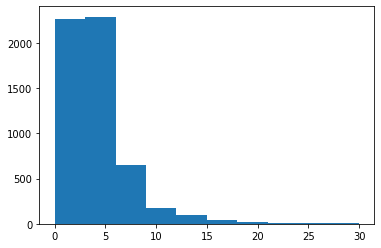

In [42]:
plt.hist(obj_cat['flux_radius_ave_i'], range=(0, 30))

In [18]:
## Adaptive cutout size??  
# Normal objects, use 1.0 arcmin cutout.
# Radius > 20 arcsec, use 1.5 arcmin cutout.
# Radius > 30 arcsec, use 2.0 arcmin cutout.
size = np.ones(len(cat)) * 1.0 * u.arcmin

size[cat['flux_radius_ave_i'] > 20] = 1.5 * u.arcmin # shoud be larger
size[cat['flux_radius_ave_i'] > 30] = 2 * u.arcmin # should be larger 

cat['cutout_size'] = size.value
#cat.write('./Catalog/NSA/nsa_20hosts_sample_211103.fits', overwrite=True)

### Generate cutout

Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/nsa_sample/lsbg_cutout_nsa.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/nsa_20hosts_cutout_cat.fits`